# _PeerLoanKart - Loan Repayment Prediction Project_
**_Importing the required libraries & packages_**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
import seaborn as sns
import ydata_profiling as pf
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , ExtraTreesClassifier , GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB , BernoulliNB , MultinomialNB
from sklearn.metrics import accuracy_score,classification_report ,confusion_matrix
from  sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import warnings
warnings.filterwarnings('ignore')

**_Changing The Default Working Directory & Path and Reading The Dataset Using Pandas Command and displaying the first five observation in the dataframe_**

In [2]:
os.chdir('C:\\Users\\chand\\OneDrive\\Desktop\\Loan Data\\')
df = pd.read_csv('loan_data.csv')
df.head()

credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   

   delinq.2yrs  pub.rec  not.fully.paid  
0            0        0               0  
1            0        0               0  
2            0        0               0  
3            0        0               0  
4            1        0               0

## _Exploratory Data analysis_
**_Gettintg the shape of the dataframe._**

In [3]:
df.shape

(9578, 14)

**_Checking for the duplicate value in the dataframe_**

In [4]:
df.duplicated().sum()

0

**_Checking for the null value in all the columns from the dataframe_**

In [5]:
df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

**_Getting the Dtypes and Non-null count of all the columns from the dataset using <span style='color:violet'> Info() </span> statement_**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


**_Getting the summary of various descriptive statistics for the numeric column in the dataframe and transposing it for the better view_**

In [7]:
df.describe().T

count          mean           std         min  \
credit.policy      9578.0      0.804970      0.396245    0.000000   
int.rate           9578.0      0.122640      0.026847    0.060000   
installment        9578.0    319.089413    207.071301   15.670000   
log.annual.inc     9578.0     10.932117      0.614813    7.547502   
dti                9578.0     12.606679      6.883970    0.000000   
fico               9578.0    710.846314     37.970537  612.000000   
days.with.cr.line  9578.0   4560.767197   2496.930377  178.958333   
revol.bal          9578.0  16913.963876  33756.189557    0.000000   
revol.util         9578.0     46.799236     29.014417    0.000000   
inq.last.6mths     9578.0      1.577469      2.200245    0.000000   
delinq.2yrs        9578.0      0.163708      0.546215    0.000000   
pub.rec            9578.0      0.062122      0.262126    0.000000   
not.fully.paid     9578.0      0.160054      0.366676    0.000000   

                           25%          50%           75%           max  
credit.policy         1.000000     1.000000      1.000000  1.000000e+00  
int.rate              0.103900     0.122100      0.140700  2.164000e-01  
installment         163.770000   268.950000    432.762500  9.401400e+02  
log.annual.inc       10.558414    10.928884     11.291293  1.452835e+01  
dti                   7.212500    12.665000     17.950000  2.996000e+01  
fico                682.000000   707.000000    737.000000  8.270000e+02  
days.with.cr.line  2820.000000  4139.958333   5730.000000  1.763996e+04  
revol.bal          3187.000000  8596.000000  18249.500000  1.207359e+06  
revol.util           22.600000    46.300000     70.900000  1.190000e+02  
inq.last.6mths        0.000000     1.000000      2.000000  3.300000e+01  
delinq.2yrs           0.000000     0.000000      0.000000  1.300000e+01  
pub.rec               0.000000     0.000000      0.000000  5.000000e+00  
not.fully.paid        0.000000     0.000000      0.000000  1.000000e+00

**_Getting the Correlation Matrix for all numeric column in the dataframe_**

In [8]:
df.corr()

credit.policy  int.rate  installment  log.annual.inc  \
credit.policy           1.000000 -0.294089     0.058770        0.034906   
int.rate               -0.294089  1.000000     0.276140        0.056383   
installment             0.058770  0.276140     1.000000        0.448102   
log.annual.inc          0.034906  0.056383     0.448102        1.000000   
dti                    -0.090901  0.220006     0.050202       -0.054065   
fico                    0.348319 -0.714821     0.086039        0.114576   
days.with.cr.line       0.099026 -0.124022     0.183297        0.336896   
revol.bal              -0.187518  0.092527     0.233625        0.372140   
revol.util             -0.104095  0.464837     0.081356        0.054881   
inq.last.6mths         -0.535511  0.202780    -0.010419        0.029171   
delinq.2yrs            -0.076318  0.156079    -0.004368        0.029203   
pub.rec                -0.054243  0.098162    -0.032760        0.016506   
not.fully.paid         -0.158119  0.159552     0.049955       -0.033439   

                        dti      fico  days.with.cr.line  revol.bal  \
credit.policy     -0.090901  0.348319           0.099026  -0.187518   
int.rate           0.220006 -0.714821          -0.124022   0.092527   
installment        0.050202  0.086039           0.183297   0.233625   
log.annual.inc    -0.054065  0.114576           0.336896   0.372140   
dti                1.000000 -0.241191           0.060101   0.188748   
fico              -0.241191  1.000000           0.263880  -0.015553   
days.with.cr.line  0.060101  0.263880           1.000000   0.229344   
revol.bal          0.188748 -0.015553           0.229344   1.000000   
revol.util         0.337109 -0.541289          -0.024239   0.203779   
inq.last.6mths     0.029189 -0.185293          -0.041736   0.022394   
delinq.2yrs       -0.021792 -0.216340           0.081374  -0.033243   
pub.rec            0.006209 -0.147592           0.071826  -0.031010   
not.fully.paid     0.037362 -0.149666          -0.029237   0.053699   

                   revol.util  inq.last.6mths  delinq.2yrs   pub.rec  \
credit.policy       -0.104095       -0.535511    -0.076318 -0.054243   
int.rate             0.464837        0.202780     0.156079  0.098162   
installment          0.081356       -0.010419    -0.004368 -0.032760   
log.annual.inc       0.054881        0.029171     0.029203  0.016506   
dti                  0.337109        0.029189    -0.021792  0.006209   
fico                -0.541289       -0.185293    -0.216340 -0.147592   
days.with.cr.line   -0.024239       -0.041736     0.081374  0.071826   
revol.bal            0.203779        0.022394    -0.033243 -0.031010   
revol.util           1.000000       -0.013880    -0.042740  0.066717   
inq.last.6mths      -0.013880        1.000000     0.021245  0.072673   
delinq.2yrs         -0.042740        0.021245     1.000000  0.009184   
pub.rec              0.066717        0.072673     0.009184  1.000000   
not.fully.paid       0.082088        0.149452     0.008881  0.048634   

                   not.fully.paid  
credit.policy           -0.158119  
int.rate                 0.159552  
installment              0.049955  
log.annual.inc          -0.033439  
dti                      0.037362  
fico                    -0.149666  
days.with.cr.line       -0.029237  
revol.bal                0.053699  
revol.util               0.082088  
inq.last.6mths           0.149452  
delinq.2yrs              0.008881  
pub.rec                  0.048634  
not.fully.paid           1.000000

**_Automated Exploratory Data Analysis (EDA) with ydata_profiling(pandas_profiling) exporting it as <span style='color:blue'> .html</span> file and displaying the result_**

In [9]:
EDA_Report = pf.ProfileReport(df)
EDA_Report.to_file('EDA_Report.html')
EDA_Report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## _Data Visuvalisation_
**_Plotting the bar graph with count of customer borrowed loan for various purpose with their repayment count from `purpose` , `not.fully.paid` column and identifying the customer who not paid their loan based on the purpose of loan from the dataframe and saving it as png file._**

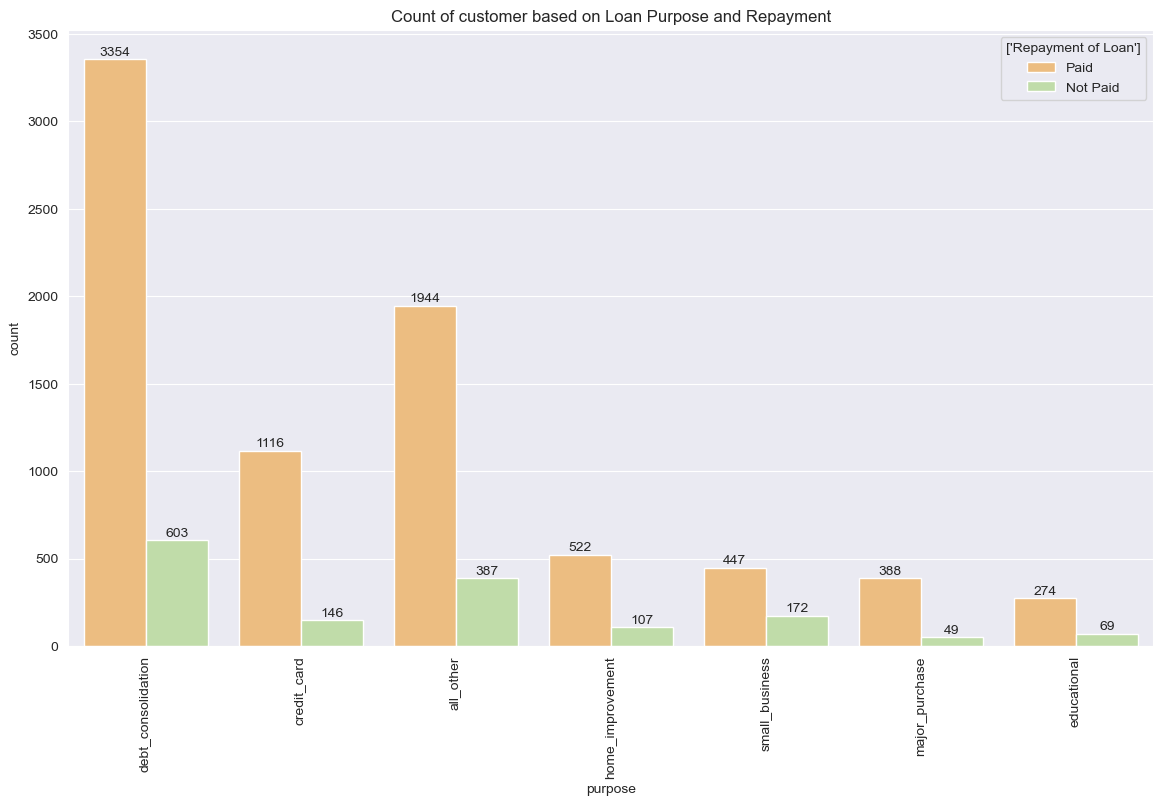

In [10]:
plt.rcParams['figure.figsize'] = (14,8)
sns.set_style('darkgrid')
plot = sns.countplot(x = df['purpose'] ,hue = df['not.fully.paid'] , data = df ,palette = 'Spectral')
plt.xticks(rotation = 90)
for p in plot.patches:
        plot.annotate(p.get_height(),(p.get_x()+p.get_width()/2.0,p.get_height()),
                  ha='center',va='center',xytext=(0,5),textcoords='offset points')
plt.legend(title = ['Repayment of Loan'],labels = ['Paid','Not Paid'])
plt.title('Count of customer based on Loan Purpose and Repayment')
plt.savefig('Count of customer based on Loan Purpose and Repayment.png')
plt.show()

**_Plotting the Histogram to show the distribution of data for both Negative and Positive Credit Policy based on `Credit.policy` and `Fico` (Fair Isaac Corporation) which fairly represent the Credit score of the customer and saving the png file._**

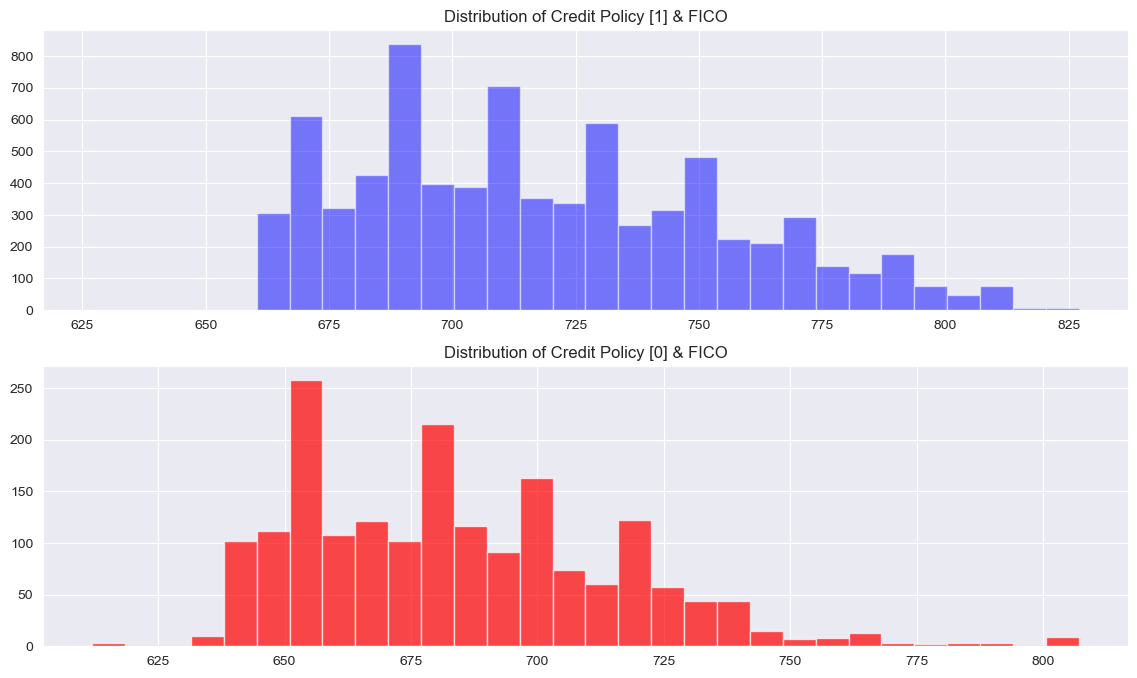

In [11]:
fig , (ax1, ax2) = plt.subplots(sharex = False, sharey = False, nrows = 2, ncols = 1)
df[df['credit.policy'] == 1]['fico'].hist(alpha = 0.5, bins = 30, color = 'b', ax = ax1)
df[df['credit.policy'] == 0]['fico'].hist(alpha = 0.7,bins = 30, color = 'r', ax = ax2)
ax1.set_title('Distribution of Credit Policy [1] & FICO')
ax2.set_title('Distribution of Credit Policy [0] & FICO')
plt.subplots_adjust(hspace = 0.2)
plt.savefig('Data Distribution based on Credit Policy and FICO Score.png')
plt.show()

**_Plotting the Histogram individualy to show the distribution of data for Loan Repayment Status based on `not.Fully.paid` and `Fico` (Fair Isaac Corporation) which fairly represent the Credit score of the customer and saving the png file._**

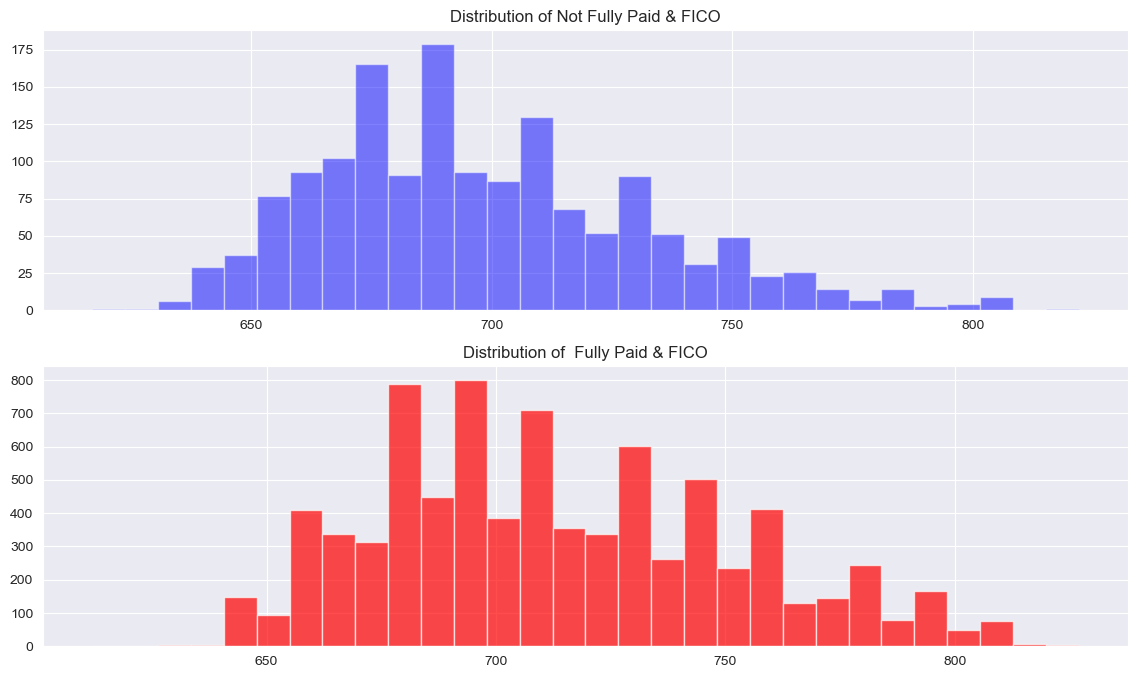

In [12]:
fig , (ax1, ax2) = plt.subplots(sharex = False, sharey = False, nrows = 2, ncols = 1)
df[df['not.fully.paid'] == 1]['fico'].hist(alpha = 0.5, bins = 30, color = 'b', ax = ax1)
df[df['not.fully.paid'] == 0]['fico'].hist(alpha = 0.7,bins = 30, color = 'r', ax = ax2)
ax1.set_title('Distribution of Not Fully Paid & FICO')
ax2.set_title('Distribution of  Fully Paid & FICO')
plt.subplots_adjust(hspace = 0.2)
plt.savefig('Data Distribution based on Loan Repayment Status and FICO Score.png')
plt.show()

**_Displaying the value counts of Customer's loan purpose based on the `Purpose` column from the Dataframe and plotting the pie-chart based on the `Purpose` column from the dataframe to show the percentage of loan purposes and saving the png file._**

Purpose of Loan taken by Customers 


debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

****************************************************************************************************


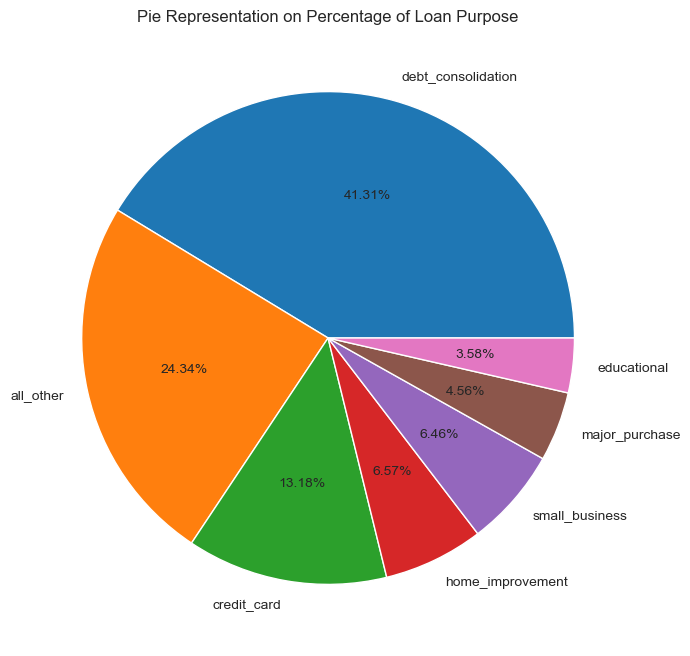

In [13]:
print('Purpose of Loan taken by Customers ')
display(df['purpose'].value_counts())
print('*'*100)
data = df['purpose'].value_counts().values
labels = df['purpose'].value_counts().index
plt.pie(data, labels = labels, autopct = "%1.2f%%")
plt.title('Pie Representation on Percentage of Loan Purpose')
plt.savefig('Percentage of Loan Purpose.png')
plt.show()

**_Displaying the value counts of Customer's Loan Repayment based on `not.fully.paid` column from the DataFrame and Plotting the Pie-Chart based on the `not.fully.paid` column from the DataFrame to show the Percentage of Customer's Loan Repayment Status and saving the PNG file_**

No. of Customers who doesn't paid loan


Fully Paid        8045
Not Fully Paid    1533
Name: not.fully.paid, dtype: int64

****************************************************************************************************


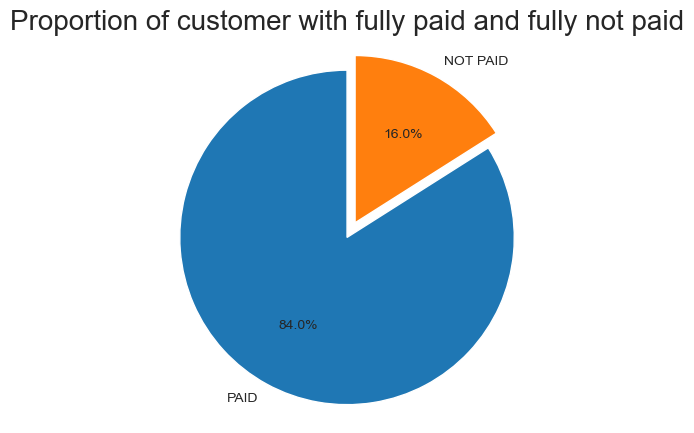

In [14]:
print("No. of Customers who doesn't paid loan")
payment_history = df['not.fully.paid'].value_counts()
payment_history.index = ['Fully Paid','Not Fully Paid']
display(payment_history)
print('*'*100)
labels = 'PAID','NOT PAID'
sizes = [df['not.fully.paid'][df['not.fully.paid']==0].count(), df['not.fully.paid'][df['not.fully.paid']==1].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(8,5))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer with fully paid and fully not paid", size = 20)
plt.savefig('Proportion of customer with paid and not paid.png')
plt.show()

**_Getting the correlation value from the needed columns from the dataframe. using seaborn Heatmap & saving the PNG file_**

<AxesSubplot:>

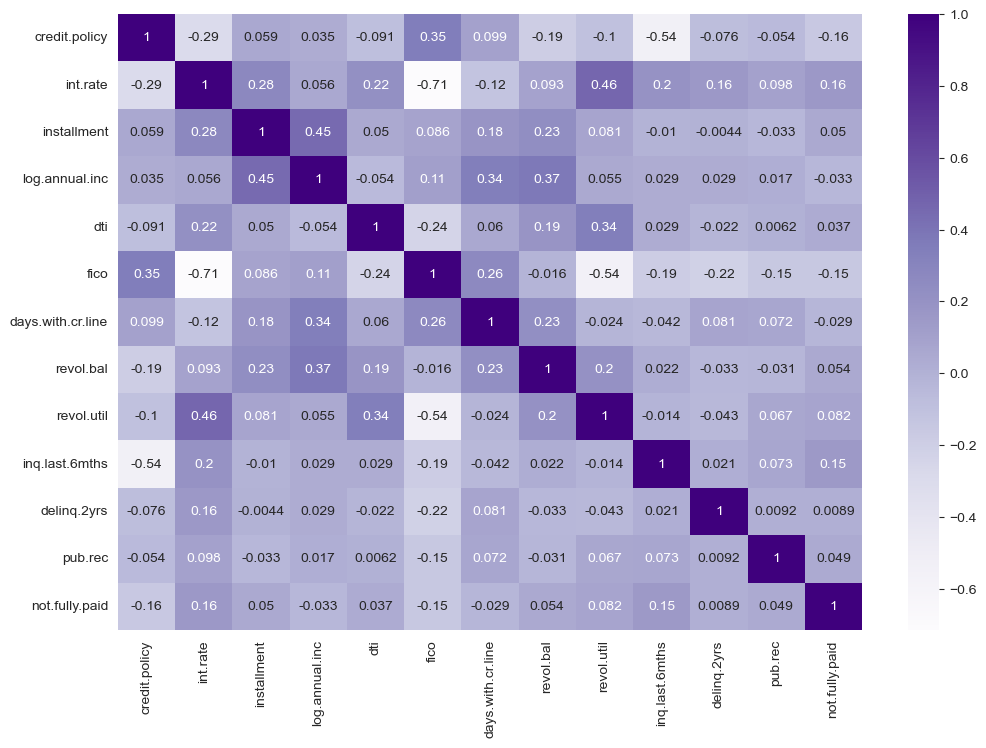

In [15]:
plt.rcParams['figure.figsize'] = (12,8)
sns.heatmap(df.corr(),annot = True , cmap = 'Purples' , cbar = True)

## _Data Cleaning_
**_One Hot Encoding the `Purpose` column from the dataframe using the pandas get dummies function, dropping the purpose column and  displaying the dataframe after one hot encoding._**

In [16]:
pur_dum = pd.get_dummies(df['purpose'],drop_first = True)
df1 = pd.concat([df,pur_dum],axis =1)
df1.drop(['purpose'],axis = 1,inplace = True)
df1.head()

credit.policy  int.rate  installment  log.annual.inc    dti  fico  \
0              1    0.1189       829.10       11.350407  19.48   737   
1              1    0.1071       228.22       11.082143  14.29   707   
2              1    0.1357       366.86       10.373491  11.63   682   
3              1    0.1008       162.34       11.350407   8.10   712   
4              1    0.1426       102.92       11.299732  14.97   667   

   days.with.cr.line  revol.bal  revol.util  inq.last.6mths  delinq.2yrs  \
0        5639.958333      28854        52.1               0            0   
1        2760.000000      33623        76.7               0            0   
2        4710.000000       3511        25.6               1            0   
3        2699.958333      33667        73.2               1            0   
4        4066.000000       4740        39.5               0            1   

   pub.rec  not.fully.paid  credit_card  debt_consolidation  educational  \
0        0               0            0                   1            0   
1        0               0            1                   0            0   
2        0               0            0                   1            0   
3        0               0            0                   1            0   
4        0               0            1                   0            0   

   home_improvement  major_purchase  small_business  
0                 0               0               0  
1                 0               0               0  
2                 0               0               0  
3                 0               0               0  
4                 0               0               0

In [17]:
x = df1.drop(['not.fully.paid'],axis = 1)
y = df1['not.fully.paid']

## _Model Fitting_
**_Defining the Function for the ML algorithms using <span style='color:violet'>GridSearchCV </span> Algorithm and splitting the dependent variable & independent variable into training and test dataset and Predicting the Dependent Variable by fitting the given model and creating the pickle file of the model with the given Algo_name. Further getting the Algorithm Name, Best Parameters of the algorithm ,Accuracy Score in percentage format,Classification Report and Confusion Matrix between the predicted values and dependent test dataset._**

In [18]:
def FitModel(x,y,algo_name,algorithm,gridSearchParams,cv):
    np.random.seed(50)
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 95)
    grid = GridSearchCV(estimator = algorithm , param_grid = gridSearchParams , scoring = 'accuracy' ,verbose = 0,n_jobs = 1,
                       cv = cv)
    grid_result = grid.fit(x_train,y_train)
    pred = grid_result.predict(x_test)
    best_params = grid_result.best_params_
    pickle.dump(grid_result,open(algo_name,'wb'))
    print('Algorithm Name :',algo_name,'\n')
    print('Best Params :',best_params,'\n')
    print('Accuracy Score of Test Data : {0:.2f} %'.format(100*accuracy_score(y_test,pred)),'\n')
    print('Confusion Matrix :','\n',confusion_matrix(y_test,pred),'\n')
    print('Classification Report :\n',classification_report(y_test,pred))

**_Running the function with empty parameters since the <span style='color:violet'>Logistic Regression </span> model doesn't need any special parameters and fitting the Logistic Regression and getting the Algorithm Name, Best Parameters of the algorithm, best estimator of the fitted model ,Accuracy Score in percentage format,Classification Report and Confusion Matrix between the predicted values and dependent test dataset, and also creating the pickle file with the name Logistic Regression._**

In [19]:
params = {}
FitModel(x,y,'Logistic Regression',LogisticRegression(),params,cv = 10)

<IPython.core.display.Javascript object>

Algorithm Name : Logistic Regression 

Best Params : {} 

Accuracy Score of Test Data : 84.10 % 

Confusion Matrix : 
 [[2413    2]
 [ 455    4]] 

Classification Report :
               precision    recall  f1-score   support

           0       0.84      1.00      0.91      2415
           1       0.67      0.01      0.02       459

    accuracy                           0.84      2874
   macro avg       0.75      0.50      0.47      2874
weighted avg       0.81      0.84      0.77      2874



**_Running the function with empty parameters since the <span style='color:violet'> GaussianNB </span> model doesn't need any special parameters and fitting the GaussianNB and getting the Algorithm Name, Best Parameters of the algorithm, best estimator of the fitted model ,Accuracy Score in percentage format,Classification Report and Confusion Matrix between the predicted values and dependent test dataset, and also creating the pickle file with the name GaussianNB._**

In [20]:
params = {}
FitModel(x,y,'GaussianNB',GaussianNB(),params,cv = 10)

<IPython.core.display.Javascript object>

Algorithm Name : GaussianNB 

Best Params : {} 

Accuracy Score of Test Data : 81.87 % 

Confusion Matrix : 
 [[2308  107]
 [ 414   45]] 

Classification Report :
               precision    recall  f1-score   support

           0       0.85      0.96      0.90      2415
           1       0.30      0.10      0.15       459

    accuracy                           0.82      2874
   macro avg       0.57      0.53      0.52      2874
weighted avg       0.76      0.82      0.78      2874



**_Running the function with empty parameters since the <span style='color:violet'> BernoulliNB </span> model doesn't need any special parameters and fitting the BernoulliNB and getting the Algorithm Name, Best Parameters of the algorithm, best estimator of the fitted model ,Accuracy Score in percentage format,Classification Report and Confusion Matrix between the predicted values and dependent test dataset, and also creating the pickle file with the name BernoulliNB._**

In [21]:
params = {}
FitModel(x,y,'BernoulliNB',BernoulliNB(),params,cv = 10)

<IPython.core.display.Javascript object>

Algorithm Name : BernoulliNB 

Best Params : {} 

Accuracy Score of Test Data : 84.13 % 

Confusion Matrix : 
 [[2412    3]
 [ 453    6]] 

Classification Report :
               precision    recall  f1-score   support

           0       0.84      1.00      0.91      2415
           1       0.67      0.01      0.03       459

    accuracy                           0.84      2874
   macro avg       0.75      0.51      0.47      2874
weighted avg       0.81      0.84      0.77      2874



**_Running the function with empty parameters since the <span style='color:violet'> MultinomialNB </span> model doesn't need any special parameters and fitting the MultinomialNB and getting the Algorithm Name, Best Parameters of the algorithm, best estimator of the fitted model ,Accuracy Score in percentage format,Classification Report and Confusion Matrix between the predicted values and dependent test dataset, and also creating the pickle file with the name MultinomialNB._**

In [22]:
params = {}
FitModel(x,y,'MultinomialNB',MultinomialNB(),params,cv = 10)

<IPython.core.display.Javascript object>

Algorithm Name : MultinomialNB 

Best Params : {} 

Accuracy Score of Test Data : 67.01 % 

Confusion Matrix : 
 [[1775  640]
 [ 308  151]] 

Classification Report :
               precision    recall  f1-score   support

           0       0.85      0.73      0.79      2415
           1       0.19      0.33      0.24       459

    accuracy                           0.67      2874
   macro avg       0.52      0.53      0.52      2874
weighted avg       0.75      0.67      0.70      2874



**_Running the function with some appropriate parameter and fitting the <span style='color:violet'> KNeighborsClassifier </span> algorithm and getting the Algorithm Name, Best Parameters of the algorithm, best estimator of the fitted model ,Accuracy Score in percentage format,Classification Report and Confusion Matrix between the predicted values and dependent test dataset,  and also creating the pickle file with the name KNeighbors._**

In [23]:
params = {'n_neighbors':[5,7,9,11,13,15],
         'p':[1,2]}
FitModel(x,y,'KNeighbors',KNeighborsClassifier(),params,cv = 10)

<IPython.core.display.Javascript object>

Algorithm Name : KNeighbors 

Best Params : {'n_neighbors': 15, 'p': 2} 

Accuracy Score of Test Data : 83.75 % 

Confusion Matrix : 
 [[2407    8]
 [ 459    0]] 

Classification Report :
               precision    recall  f1-score   support

           0       0.84      1.00      0.91      2415
           1       0.00      0.00      0.00       459

    accuracy                           0.84      2874
   macro avg       0.42      0.50      0.46      2874
weighted avg       0.71      0.84      0.77      2874



**_Running the function with some appropriate parameter and fitting the <span style='color:violet'>SVC </span> algorithm and getting the Algorithm Name, Best Parameters of the algorithm, best estimator of the fitted model ,Accuracy Score in percentage format,Classification Report and Confusion Matrix between the predicted values and dependent test dataset,  and also creating the pickle file with the name SVC._**

In [24]:
params = {'C':[0.01,0.1,1],
         'gamma':[0.005,0.05,0.01]}
FitModel(x,y,'SVC',SVC(),params,cv = 10)

<IPython.core.display.Javascript object>

Algorithm Name : SVC 

Best Params : {'C': 0.01, 'gamma': 0.005} 

Accuracy Score of Test Data : 84.03 % 

Confusion Matrix : 
 [[2415    0]
 [ 459    0]] 

Classification Report :
               precision    recall  f1-score   support

           0       0.84      1.00      0.91      2415
           1       0.00      0.00      0.00       459

    accuracy                           0.84      2874
   macro avg       0.42      0.50      0.46      2874
weighted avg       0.71      0.84      0.77      2874



**_Running the function with some appropriate parameter and fitting the <span style='color:violet'> Decision Tree Classifier </span> algorithm and getting the Algorithm Name, Best Parameters of the algorithm, best estimator of the fitted model ,Accuracy Score in percentage format,Classification Report and Confusion Matrix between the predicted values and dependent test dataset,  and also creating the pickle file with the name Decision Tree._**

In [25]:
params = {'criterion':['gini','entropy']}
FitModel(x,y,'Decision Tree',DecisionTreeClassifier(),params,cv = 10)

<IPython.core.display.Javascript object>

Algorithm Name : Decision Tree 

Best Params : {'criterion': 'entropy'} 

Accuracy Score of Test Data : 73.83 % 

Confusion Matrix : 
 [[2004  411]
 [ 341  118]] 

Classification Report :
               precision    recall  f1-score   support

           0       0.85      0.83      0.84      2415
           1       0.22      0.26      0.24       459

    accuracy                           0.74      2874
   macro avg       0.54      0.54      0.54      2874
weighted avg       0.75      0.74      0.75      2874



**_Running the function with some appropriate parameter and fitting the <span style='color:violet'> RandomForestClassifier </span> algorithm and getting the Algorithm Name, Best Parameters of the algorithm, best estimator of the fitted model ,Accuracy Score in percentage format,Classification Report and Confusion Matrix between the predicted values and dependent test dataset,  and also creating the pickle file with the name Random Forest._**

In [26]:
params = {'n_estimators':[111,222,333,444,555],
         'criterion':['gini','entropy']}
FitModel(x,y,'Random Forest',RandomForestClassifier(),params,cv = 10)

<IPython.core.display.Javascript object>

Algorithm Name : Random Forest 

Best Params : {'criterion': 'entropy', 'n_estimators': 444} 

Accuracy Score of Test Data : 84.06 % 

Confusion Matrix : 
 [[2410    5]
 [ 453    6]] 

Classification Report :
               precision    recall  f1-score   support

           0       0.84      1.00      0.91      2415
           1       0.55      0.01      0.03       459

    accuracy                           0.84      2874
   macro avg       0.69      0.51      0.47      2874
weighted avg       0.79      0.84      0.77      2874



**_Running the function with some appropriate parameter and fitting the <span style='color:violet'> ExtraTreesClassifier </span> algorithm and getting the Algorithm Name, Best Parameters of the algorithm, best estimator of the fitted model ,Accuracy Score in percentage format,Classification Report and Confusion Matrix between the predicted values and dependent test dataset,  and also creating the pickle file with the name Extra Trees._**

In [27]:
params = {'n_estimators':[111,222,333,444,555],
         'criterion':['gini','entropy']}
FitModel(x,y,'Extra Trees',ExtraTreesClassifier(),params,cv = 10)

<IPython.core.display.Javascript object>

Algorithm Name : Extra Trees 

Best Params : {'criterion': 'gini', 'n_estimators': 555} 

Accuracy Score of Test Data : 84.06 % 

Confusion Matrix : 
 [[2397   18]
 [ 440   19]] 

Classification Report :
               precision    recall  f1-score   support

           0       0.84      0.99      0.91      2415
           1       0.51      0.04      0.08       459

    accuracy                           0.84      2874
   macro avg       0.68      0.52      0.49      2874
weighted avg       0.79      0.84      0.78      2874



**_Running the function with some appropriate parameter and fitting the <span style='color:violet'> GradientBoostingClassifier </span> algorithm and getting the Algorithm Name, Best Parameters of the algorithm, best estimator of the fitted model ,Accuracy Score in percentage format,Classification Report and Confusion Matrix between the predicted values and dependent test dataset,  and also creating the pickle file with the name Gradient Boost._**

In [28]:
params = {'n_estimators':[111,222,333,444,555],
         'criterion' : ['friedman_mse','squared_error'],
         'loss':['deviance','exponential']}
FitModel(x,y,'Gradient Boost',GradientBoostingClassifier(),params,cv = 10)

<IPython.core.display.Javascript object>

Algorithm Name : Gradient Boost 

Best Params : {'criterion': 'friedman_mse', 'loss': 'exponential', 'n_estimators': 111} 

Accuracy Score of Test Data : 84.34 % 

Confusion Matrix : 
 [[2407    8]
 [ 442   17]] 

Classification Report :
               precision    recall  f1-score   support

           0       0.84      1.00      0.91      2415
           1       0.68      0.04      0.07       459

    accuracy                           0.84      2874
   macro avg       0.76      0.52      0.49      2874
weighted avg       0.82      0.84      0.78      2874



**_Running the function with some appropriate parameter and fitting the <span style='color:violet'> XGB Classifier </span> algorithm and getting the Algorithm Name, Best Parameters of the algorithm, best estimator of the fitted model ,Accuracy Score in percentage format,Classification Report and Confusion Matrix between the predicted values and dependent test dataset,  and also creating the pickle file with the name XGB Classifier._**

In [29]:
params = {'n_estimators':[111,222,333,444,555]}
FitModel(x,y,'XGB Classifier',XGBClassifier(),params,cv = 10)

<IPython.core.display.Javascript object>

Algorithm Name : XGB Classifier 

Best Params : {'n_estimators': 111} 

Accuracy Score of Test Data : 82.78 % 

Confusion Matrix : 
 [[2347   68]
 [ 427   32]] 

Classification Report :
               precision    recall  f1-score   support

           0       0.85      0.97      0.90      2415
           1       0.32      0.07      0.11       459

    accuracy                           0.83      2874
   macro avg       0.58      0.52      0.51      2874
weighted avg       0.76      0.83      0.78      2874



**_Running the function with some appropriate parameter and fitting the <span style='color:violet'> CatBoostClassifier </span> algorithm and getting the Algorithm Name, Best Parameters of the algorithm, best estimator of the fitted model ,Accuracy Score in percentage format,Classification Report and Confusion Matrix between the predicted values and dependent test dataset,  and also creating the pickle file with the name Cat Boost._**

In [30]:
params = {'verbose':[0]}
FitModel(x,y,'Cat Boost',CatBoostClassifier(),params,cv = 10)

<IPython.core.display.Javascript object>

Algorithm Name : Cat Boost 

Best Params : {'verbose': 0} 

Accuracy Score of Test Data : 84.03 % 

Confusion Matrix : 
 [[2394   21]
 [ 438   21]] 

Classification Report :
               precision    recall  f1-score   support

           0       0.85      0.99      0.91      2415
           1       0.50      0.05      0.08       459

    accuracy                           0.84      2874
   macro avg       0.67      0.52      0.50      2874
weighted avg       0.79      0.84      0.78      2874



**_Running the function with some appropriate parameter and fitting the <span style='color:violet'> LGBMClassifier </span> algorithm and getting the Algorithm Name, Best Parameters of the algorithm, best estimator of the fitted model ,Accuracy Score in percentage format,Classification Report and Confusion Matrix between the predicted values and dependent test dataset,  and also creating the pickle file with the name Light GBM._**

In [31]:
params = {}
FitModel(x,y,'Light GBM',LGBMClassifier(),params,cv = 10)

<IPython.core.display.Javascript object>

Algorithm Name : Light GBM 

Best Params : {} 

Accuracy Score of Test Data : 83.58 % 

Confusion Matrix : 
 [[2380   35]
 [ 437   22]] 

Classification Report :
               precision    recall  f1-score   support

           0       0.84      0.99      0.91      2415
           1       0.39      0.05      0.09       459

    accuracy                           0.84      2874
   macro avg       0.62      0.52      0.50      2874
weighted avg       0.77      0.84      0.78      2874



**_Resampling the dependent variable so that the dependent variable values get balanced and assigning the new name for resampled variable. Displaying the dependent variable count before and after oversampling_**

In [32]:
print('Before Oversampling')
display(df['not.fully.paid'].value_counts())
sm = SMOTE(random_state = 95)
x_res , y_res = sm.fit_resample(x,y)
print('-'*50)
print('After Oversampling')
display(y_res.value_counts())

Before Oversampling


0    8045
1    1533
Name: not.fully.paid, dtype: int64

--------------------------------------------------
After Oversampling


0    8045
1    8045
Name: not.fully.paid, dtype: int64

**_Running the function with empty parameters since the <span style='color:violet'>Logistic Regression </span> model doesn't need any special parameters and fitting the Logistic Regression with resampled dependent and independent variable and getting the Algorithm Name, Best Parameters of the algorithm, best estimator of the fitted model ,Accuracy Score in percentage format,Classification Report and Confusion Matrix between the predicted values and dependent test dataset, and also creating the pickle file with the name Logistic Regression._**

In [33]:
params = {}
FitModel(x_res,y_res,'Logistic Regression',LogisticRegression(),params,cv = 10)

<IPython.core.display.Javascript object>

Algorithm Name : Logistic Regression 

Best Params : {} 

Accuracy Score of Test Data : 57.86 % 

Confusion Matrix : 
 [[1385 1026]
 [1008 1408]] 

Classification Report :
               precision    recall  f1-score   support

           0       0.58      0.57      0.58      2411
           1       0.58      0.58      0.58      2416

    accuracy                           0.58      4827
   macro avg       0.58      0.58      0.58      4827
weighted avg       0.58      0.58      0.58      4827



**_Running the function with empty parameters since the <span style='color:violet'> GaussianNB </span> model doesn't need any special parameters and fitting the GaussianNB with resampled dependent and independent variable and getting the Algorithm Name, Best Parameters of the algorithm, best estimator of the fitted model ,Accuracy Score in percentage format,Classification Report and Confusion Matrix between the predicted values and dependent test dataset, and also creating the pickle file with the name GaussianNB._**

In [34]:
params = {}
FitModel(x_res,y_res,'GaussianNB',GaussianNB(),params,cv = 10)

<IPython.core.display.Javascript object>

Algorithm Name : GaussianNB 

Best Params : {} 

Accuracy Score of Test Data : 62.05 % 

Confusion Matrix : 
 [[1630  781]
 [1051 1365]] 

Classification Report :
               precision    recall  f1-score   support

           0       0.61      0.68      0.64      2411
           1       0.64      0.56      0.60      2416

    accuracy                           0.62      4827
   macro avg       0.62      0.62      0.62      4827
weighted avg       0.62      0.62      0.62      4827



**_Running the function with empty parameters since the <span style='color:violet'> BernoulliNB </span> model doesn't need any special parameters and fitting the BernoulliNB with resampled dependent and independent variable and getting the Algorithm Name, Best Parameters of the algorithm, best estimator of the fitted model ,Accuracy Score in percentage format,Classification Report and Confusion Matrix between the predicted values and dependent test dataset, and also creating the pickle file with the name BernoulliNB._**

In [35]:
params = {}
FitModel(x_res,y_res,'BernoulliNB',BernoulliNB(),params,cv = 10)

<IPython.core.display.Javascript object>

Algorithm Name : BernoulliNB 

Best Params : {} 

Accuracy Score of Test Data : 70.58 % 

Confusion Matrix : 
 [[1855  556]
 [ 864 1552]] 

Classification Report :
               precision    recall  f1-score   support

           0       0.68      0.77      0.72      2411
           1       0.74      0.64      0.69      2416

    accuracy                           0.71      4827
   macro avg       0.71      0.71      0.70      4827
weighted avg       0.71      0.71      0.70      4827



**_Running the function with empty parameters since the <span style='color:violet'> MultinomialNB </span> model doesn't need any special parameters and fitting the MultinomialNB with resampled dependent and independent variable and getting the Algorithm Name, Best Parameters of the algorithm, best estimator of the fitted model ,Accuracy Score in percentage format,Classification Report and Confusion Matrix between the predicted values and dependent test dataset, and also creating the pickle file with the name MultinomialNB._**

In [36]:
params = {}
FitModel(x_res,y_res,'MultinomialNB',MultinomialNB(),params,cv = 10)

<IPython.core.display.Javascript object>

Algorithm Name : MultinomialNB 

Best Params : {} 

Accuracy Score of Test Data : 52.06 % 

Confusion Matrix : 
 [[1786  625]
 [1689  727]] 

Classification Report :
               precision    recall  f1-score   support

           0       0.51      0.74      0.61      2411
           1       0.54      0.30      0.39      2416

    accuracy                           0.52      4827
   macro avg       0.53      0.52      0.50      4827
weighted avg       0.53      0.52      0.50      4827



**_Running the function with some appropriate parameter and fitting the <span style='color:violet'> KNeighborsClassifier </span> algorithm with resampled dependent and independent variable and getting the Algorithm Name, Best Parameters of the algorithm, best estimator of the fitted model ,Accuracy Score in percentage format,Classification Report and Confusion Matrix between the predicted values and dependent test dataset,  and also creating the pickle file with the name KNeighbors._**

In [37]:
params = {'n_neighbors':[5,7,9,11,13,15],
         'p':[1,2]}
FitModel(x_res,y_res,'KNeighbors',KNeighborsClassifier(),params,cv = 10)

<IPython.core.display.Javascript object>

Algorithm Name : KNeighbors 

Best Params : {'n_neighbors': 5, 'p': 1} 

Accuracy Score of Test Data : 74.62 % 

Confusion Matrix : 
 [[1500  911]
 [ 314 2102]] 

Classification Report :
               precision    recall  f1-score   support

           0       0.83      0.62      0.71      2411
           1       0.70      0.87      0.77      2416

    accuracy                           0.75      4827
   macro avg       0.76      0.75      0.74      4827
weighted avg       0.76      0.75      0.74      4827



**_Running the function with some appropriate parameter and fitting the <span style='color:violet'> SVC </span> algorithm with resampled dependent and independent variable and getting the Algorithm Name, Best Parameters of the algorithm, best estimator of the fitted model ,Accuracy Score in percentage format,Classification Report and Confusion Matrix between the predicted values and dependent test dataset,  and also creating the pickle file with the name SVC._**

In [38]:
params = {'C':[0.01,0.1,1],
         'gamma':[0.005,0.05,0.01]}
FitModel(x_res,y_res,'SVC',SVC(),params,cv = 10)

<IPython.core.display.Javascript object>

Algorithm Name : SVC 

Best Params : {'C': 1, 'gamma': 0.005} 

Accuracy Score of Test Data : 61.51 % 

Confusion Matrix : 
 [[2409    2]
 [1856  560]] 

Classification Report :
               precision    recall  f1-score   support

           0       0.56      1.00      0.72      2411
           1       1.00      0.23      0.38      2416

    accuracy                           0.62      4827
   macro avg       0.78      0.62      0.55      4827
weighted avg       0.78      0.62      0.55      4827



**_Running the function with some appropriate parameter and fitting the <span style='color:violet'> DecisionTreeClassifier </span> algorithm with resampled dependent and independent variable and getting the Algorithm Name, Best Parameters of the algorithm, best estimator of the fitted model ,Accuracy Score in percentage format,Classification Report and Confusion Matrix between the predicted values and dependent test dataset,  and also creating the pickle file with the name Decision Tree._**

In [39]:
params = {'criterion':['gini','entropy']}
FitModel(x_res,y_res,'Decision Tree',DecisionTreeClassifier(),params,cv = 10)

<IPython.core.display.Javascript object>

Algorithm Name : Decision Tree 

Best Params : {'criterion': 'entropy'} 

Accuracy Score of Test Data : 77.44 % 

Confusion Matrix : 
 [[1831  580]
 [ 509 1907]] 

Classification Report :
               precision    recall  f1-score   support

           0       0.78      0.76      0.77      2411
           1       0.77      0.79      0.78      2416

    accuracy                           0.77      4827
   macro avg       0.77      0.77      0.77      4827
weighted avg       0.77      0.77      0.77      4827



**_Running the function with some appropriate parameter and fitting the <span style='color:violet'> RandomForestClassifier </span> algorithm with resampled dependent and independent variable and getting the Algorithm Name, Best Parameters of the algorithm, best estimator of the fitted model ,Accuracy Score in percentage format,Classification Report and Confusion Matrix between the predicted values and dependent test dataset,  and also creating the pickle file with the name Random Forest._**

In [40]:
params = {'n_estimators':[111,222,333,444,555],
         'criterion':['gini','entropy']}
FitModel(x_res,y_res,'Random Forest',RandomForestClassifier(),params,cv = 10)

<IPython.core.display.Javascript object>

Algorithm Name : Random Forest 

Best Params : {'criterion': 'gini', 'n_estimators': 444} 

Accuracy Score of Test Data : 84.50 % 

Confusion Matrix : 
 [[2114  297]
 [ 451 1965]] 

Classification Report :
               precision    recall  f1-score   support

           0       0.82      0.88      0.85      2411
           1       0.87      0.81      0.84      2416

    accuracy                           0.85      4827
   macro avg       0.85      0.85      0.84      4827
weighted avg       0.85      0.85      0.84      4827



**_Running the function with some appropriate parameter and fitting the <span style='color:violet'> Extra Trees Classifier </span> algorithm with resampled dependent and independent variable and getting the Algorithm Name, Best Parameters of the algorithm, best estimator of the fitted model ,Accuracy Score in percentage format,Classification Report and Confusion Matrix between the predicted values and dependent test dataset,  and also creating the pickle file with the name Extra Trees._**

In [41]:
params = {'n_estimators':[111,222,333,444,555],
         'criterion':['gini','entropy']}
FitModel(x_res,y_res,'Extra Trees',ExtraTreesClassifier(),params,cv = 10)

<IPython.core.display.Javascript object>

Algorithm Name : Extra Trees 

Best Params : {'criterion': 'gini', 'n_estimators': 444} 

Accuracy Score of Test Data : 84.23 % 

Confusion Matrix : 
 [[2065  346]
 [ 415 2001]] 

Classification Report :
               precision    recall  f1-score   support

           0       0.83      0.86      0.84      2411
           1       0.85      0.83      0.84      2416

    accuracy                           0.84      4827
   macro avg       0.84      0.84      0.84      4827
weighted avg       0.84      0.84      0.84      4827



**_Running the function with some appropriate parameter and fitting the <span style='color:violet'> GradientBoostingClassifier </span> algorithm with resampled dependent and independent variable and getting the Algorithm Name, Best Parameters of the algorithm, best estimator of the fitted model ,Accuracy Score in percentage format,Classification Report and Confusion Matrix between the predicted values and dependent test dataset,  and also creating the pickle file with the name Gradient Boost._**

In [42]:
params = {'n_estimators':[111,222,333,444,555],
         'criterion' : ['friedman_mse','squared_error'],
         'loss':['deviance','exponential']}
FitModel(x_res,y_res,'Gradient Boost',GradientBoostingClassifier(),params,cv = 10)

<IPython.core.display.Javascript object>

Algorithm Name : Gradient Boost 

Best Params : {'criterion': 'friedman_mse', 'loss': 'deviance', 'n_estimators': 555} 

Accuracy Score of Test Data : 84.36 % 

Confusion Matrix : 
 [[2141  270]
 [ 485 1931]] 

Classification Report :
               precision    recall  f1-score   support

           0       0.82      0.89      0.85      2411
           1       0.88      0.80      0.84      2416

    accuracy                           0.84      4827
   macro avg       0.85      0.84      0.84      4827
weighted avg       0.85      0.84      0.84      4827



**_Running the function with some appropriate parameter and fitting the <span style='color:violet'> XGB  Classifier </span> algorithm with resampled dependent and independent variable and getting the Algorithm Name, Best Parameters of the algorithm, best estimator of the fitted model ,Accuracy Score in percentage format,Classification Report and Confusion Matrix between the predicted values and dependent test dataset,  and also creating the pickle file with the name XGB Classifier._**

In [43]:
params = {'n_estimators':[111,222,333,444,555]}
FitModel(x_res,y_res,'XGB Classifier',XGBClassifier(),params,cv = 10)

<IPython.core.display.Javascript object>

Algorithm Name : XGB Classifier 

Best Params : {'n_estimators': 333} 

Accuracy Score of Test Data : 87.07 % 

Confusion Matrix : 
 [[2175  236]
 [ 388 2028]] 

Classification Report :
               precision    recall  f1-score   support

           0       0.85      0.90      0.87      2411
           1       0.90      0.84      0.87      2416

    accuracy                           0.87      4827
   macro avg       0.87      0.87      0.87      4827
weighted avg       0.87      0.87      0.87      4827



**_Running the function with some appropriate parameter and fitting the <span style='color:violet'> CatBoostClassifier </span> algorithm with resampled dependent and independent variable and getting the Algorithm Name, Best Parameters of the algorithm, best estimator of the fitted model ,Accuracy Score in percentage format,Classification Report and Confusion Matrix between the predicted values and dependent test dataset,  and also creating the pickle file with the name CatBoost._**

In [44]:
params = {}
FitModel(x_res,y_res,'Cat Boost',CatBoostClassifier(verbose = 0),params,cv = 10)

<IPython.core.display.Javascript object>

Algorithm Name : Cat Boost 

Best Params : {} 

Accuracy Score of Test Data : 85.25 % 

Confusion Matrix : 
 [[2162  249]
 [ 463 1953]] 

Classification Report :
               precision    recall  f1-score   support

           0       0.82      0.90      0.86      2411
           1       0.89      0.81      0.85      2416

    accuracy                           0.85      4827
   macro avg       0.86      0.85      0.85      4827
weighted avg       0.86      0.85      0.85      4827



**_Running the function with some appropriate parameter and fitting the <span style='color:violet'> LGBMClassifier </span> algorithm with resampled dependent and independent variable and getting the Algorithm Name, Best Parameters of the algorithm, best estimator of the fitted model ,Accuracy Score in percentage format,Classification Report and Confusion Matrix between the predicted values and dependent test dataset,  and also creating the pickle file with the name Light GBM._**

In [45]:
params = {}
FitModel(x_res,y_res,'Light GBM',LGBMClassifier(),params,cv = 10)

<IPython.core.display.Javascript object>

Algorithm Name : Light GBM 

Best Params : {} 

Accuracy Score of Test Data : 84.13 % 

Confusion Matrix : 
 [[2132  279]
 [ 487 1929]] 

Classification Report :
               precision    recall  f1-score   support

           0       0.81      0.88      0.85      2411
           1       0.87      0.80      0.83      2416

    accuracy                           0.84      4827
   macro avg       0.84      0.84      0.84      4827
weighted avg       0.84      0.84      0.84      4827



**_Splitting the original dependent & independent variable into training and test dataset.Fitting the Gradient Boosting Classifier model with the original train dependent and train independent variable and displaying the Accuracy of Gradient Boosting, Percentage of Accuracy Score,  Classification Report and Confusion Matrix between the predicted value and dependent test dataset_**

In [46]:
np.random.seed(10)
x_train,x_test, y_train,y_test = train_test_split (x,y,test_size = 0.2)
forest = GradientBoostingClassifier(criterion = 'friedman_mse', loss = 'exponential',n_estimators = 111)
fit = forest.fit (x_train, y_train)
accuracy = fit.score(x_test,y_test)
predict = fit.predict(x_test)
cmatrix = confusion_matrix (y_test, predict)
print ('Accuracy Score', (accuracy_score(y_test,predict)),'\n')
print ('Accuracy of Random Forest ', (accuracy),'\n')
print ('Confusion Matrix :\n',cmatrix,'\n')
print ('Classification Report:',classification_report(y_test,predict))

Accuracy Score 0.8382045929018789 

Accuracy of Random Forest  0.8382045929018789 

Confusion Matrix :
 [[1599    4]
 [ 306    7]] 

Classification Report:               precision    recall  f1-score   support

           0       0.84      1.00      0.91      1603
           1       0.64      0.02      0.04       313

    accuracy                           0.84      1916
   macro avg       0.74      0.51      0.48      1916
weighted avg       0.81      0.84      0.77      1916



**_Finding the future importance of all the column in the independent variable with respect to Gradient Boosting Classification Model above Predicted for the dimensional reduction process_**

In [47]:
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
print ("Feature Ranking:")
for f in range (x.shape[1]):
    print ("Feature %s (%f)"  %(list (x)[f],importances[indices[f]]))

Feature Ranking:
Feature credit.policy (0.137213)
Feature int.rate (0.119693)
Feature installment (0.102934)
Feature log.annual.inc (0.099723)
Feature dti (0.090755)
Feature fico (0.089418)
Feature days.with.cr.line (0.085025)
Feature revol.bal (0.074764)
Feature revol.util (0.068655)
Feature inq.last.6mths (0.044461)
Feature delinq.2yrs (0.034072)
Feature pub.rec (0.013734)
Feature credit_card (0.010869)
Feature debt_consolidation (0.007079)
Feature educational (0.007067)
Feature home_improvement (0.006958)
Feature major_purchase (0.006275)
Feature small_business (0.001304)


**_Plotting the Bar Graph to represent the Feature Importances of the Independent variable columns from the Gradient Boosting Classification Model before oversampling and saving the PNG file_**

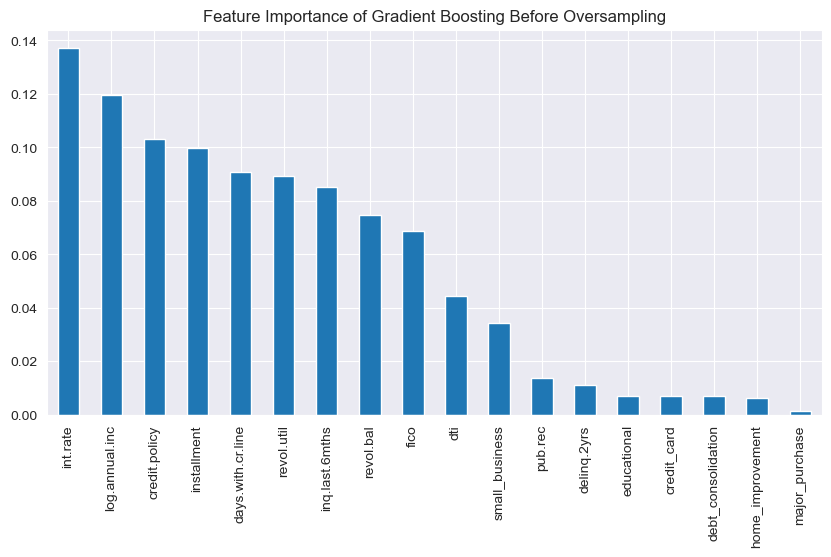

In [48]:
pd.Series(forest.feature_importances_,index=x.columns).sort_values(ascending=False).plot(kind='bar',figsize=(10,5))
plt.title('Feature Importance of Gradient Boosting Before Oversampling')
plt.savefig('Feature Importance of Gradient Boosting Before Oversampling.png')
plt.show()

**_Splitting the resampled dependent & independent variable into training and test dataset.Fitting the XGB Classifier model with the resampled  train dependent and train independent variable and displaying the Accuracy of Gradient Boosting, Percentage of Accuracy Score,  Classification Report and Confusion Matrix between the predicted value and dependent test dataset_**

In [49]:
np.random.seed(10)
x_train,x_test, y_train,y_test = train_test_split (x,y,test_size = 0.2)
forest1 = XGBClassifier(n_estimators = 333)
fit1 = forest1.fit (x_train, y_train)
accuracy = fit1.score(x_test,y_test)
predict = fit1.predict(x_test)
cmatrix = confusion_matrix (y_test, predict)
print ('Accuracy Score', (accuracy_score(y_test,predict)),'\n')
print ('Accuracy of Random Forest ', (accuracy),'\n')
print ('Confusion Matrix :\n',cmatrix,'\n')
print ('Classification Report:',classification_report(y_test,predict))

Accuracy Score 0.8251565762004175 

Accuracy of Random Forest  0.8251565762004175 

Confusion Matrix :
 [[1552   51]
 [ 284   29]] 

Classification Report:               precision    recall  f1-score   support

           0       0.85      0.97      0.90      1603
           1       0.36      0.09      0.15       313

    accuracy                           0.83      1916
   macro avg       0.60      0.53      0.53      1916
weighted avg       0.77      0.83      0.78      1916



**_Finding the future importance of all the column in the independent variable with respect to XGBoost Classification Model above Predicted for the dimensional reduction process_**

In [50]:
importances = forest1.feature_importances_
indices = np.argsort(importances)[::-1]
print ("Feature Ranking:")
for f in range (x.shape[1]):
    print ("Feature %s (%f)"  %(list (x)[f],importances[indices[f]]))

Feature Ranking:
Feature credit.policy (0.214463)
Feature int.rate (0.078162)
Feature installment (0.064500)
Feature log.annual.inc (0.064128)
Feature dti (0.056812)
Feature fico (0.044159)
Feature days.with.cr.line (0.043794)
Feature revol.bal (0.042478)
Feature revol.util (0.041339)
Feature inq.last.6mths (0.041121)
Feature delinq.2yrs (0.040966)
Feature pub.rec (0.040064)
Feature credit_card (0.039115)
Feature debt_consolidation (0.038782)
Feature educational (0.038580)
Feature home_improvement (0.037573)
Feature major_purchase (0.037277)
Feature small_business (0.036688)


**_Plotting the Bar Graph to represent the Feature Importances of the Independent variable columns from the XGBoost Classification Model after oversampling and saving the PNG file_**

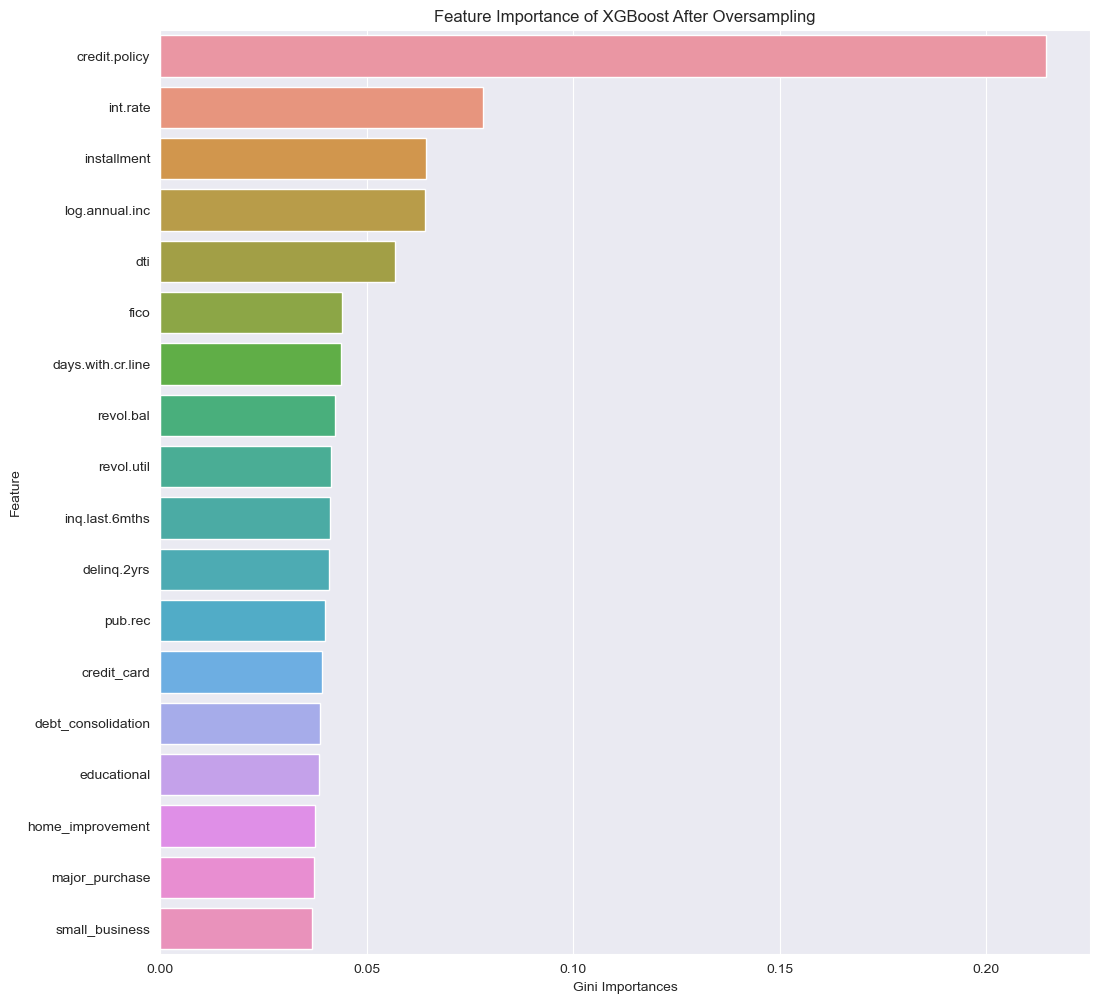

In [51]:
feat_imp = pd.DataFrame({'Feature': list(x), 'Gini importance': importances[indices]})
plt.rcParams['figure.figsize']= (12,12)
ax= sns.barplot(x ='Gini importance', y = 'Feature', data = feat_imp  )
ax.set (xlabel = 'Gini Importances')
plt.title('Feature Importance of XGBoost After Oversampling')
plt.savefig('Feature Importance of XGBoost After Oversampling.png')

**_With respect to feature importance of the independent variable reducing the dimensions of independent variable for reducing the complexity of model fitting_**

In [52]:
feat_imp.index = feat_imp.Feature
feat_to_keep = feat_imp.iloc[:11].index
display (type(feat_to_keep),feat_to_keep)

pandas.core.indexes.base.Index

Index(['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs'],
      dtype='object', name='Feature')

**_Running the function with some appropriate parameters and fitting the <span style = 'background : green'><span style = 'color : white'> XGB Classifier </span> </span> Algorithm with resampled independent and dependent variable after dimensional reduction and getting the Algorithm Name, Best Parameters of the algorithm, Percentage of Accuracy Score, Classification Report and Confusion Matrix between the predicted values and dependent test dataset, also creating the pickle file with the name XG Boost_resample_**

In [53]:
params = {'n_estimators':[111,222,333,444,555]}
FitModel(x_res[feat_to_keep],y_res,'XGB Classifier_resample',XGBClassifier(),params,cv = 10)

<IPython.core.display.Javascript object>

Algorithm Name : XGB Classifier_resample 

Best Params : {'n_estimators': 444} 

Accuracy Score of Test Data : 86.70 % 

Confusion Matrix : 
 [[2171  240]
 [ 402 2014]] 

Classification Report :
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      2411
           1       0.89      0.83      0.86      2416

    accuracy                           0.87      4827
   macro avg       0.87      0.87      0.87      4827
weighted avg       0.87      0.87      0.87      4827



_**Running the function with some appropriate parameters and fitting the <span style = 'background : green'><span style = 'color : white'> Random Forest Classifier </span> </span> Algorithm with resampled independent and dependent variable after dimensional reduction and getting the Algorithm Name, Best Parameters of the algorithm, Percentage of Accuracy Score, Classification Report and Confusion Matrix between the predicted values and dependent test dataset, also creating the pickle file with the name Random Forest_resample**_

In [54]:
params = {'n_estimators':[111,222,333,444,555],
         'criterion':['gini','entropy']}
FitModel(x_res[feat_to_keep],y_res,'Random Forest_resample',RandomForestClassifier(),params,cv = 10)

<IPython.core.display.Javascript object>

Algorithm Name : Random Forest_resample 

Best Params : {'criterion': 'entropy', 'n_estimators': 444} 

Accuracy Score of Test Data : 84.36 % 

Confusion Matrix : 
 [[2050  361]
 [ 394 2022]] 

Classification Report :
               precision    recall  f1-score   support

           0       0.84      0.85      0.84      2411
           1       0.85      0.84      0.84      2416

    accuracy                           0.84      4827
   macro avg       0.84      0.84      0.84      4827
weighted avg       0.84      0.84      0.84      4827



_**Running the function with some appropriate parameters and fitting the <span style = 'background : green'><span style = 'color : white'> Extra Trees Classifier </span> </span> Algorithm with resampled independent and dependent variable after dimensional reduction and getting the Algorithm Name, Best Parameters of the algorithm, Percentage of Accuracy Score, Classification Report and Confusion Matrix between the predicted values and dependent test dataset, also creating the pickle file with the name Extra Trees_resample**_

In [55]:
params = {'n_estimators':[111,222,333,444,555],
         'criterion':['gini','entropy']}
FitModel(x_res[feat_to_keep],y_res,'Extra Trees_resample',ExtraTreesClassifier(),params,cv = 10)

<IPython.core.display.Javascript object>

Algorithm Name : Extra Trees_resample 

Best Params : {'criterion': 'gini', 'n_estimators': 333} 

Accuracy Score of Test Data : 83.30 % 

Confusion Matrix : 
 [[1998  413]
 [ 393 2023]] 

Classification Report :
               precision    recall  f1-score   support

           0       0.84      0.83      0.83      2411
           1       0.83      0.84      0.83      2416

    accuracy                           0.83      4827
   macro avg       0.83      0.83      0.83      4827
weighted avg       0.83      0.83      0.83      4827



_**Running the function with some appropriate parameters and fitting the <span style = 'background : green'><span style = 'color : white'> Gradient Boosting Classifier </span> </span> Algorithm with resampled independent and dependent variable after dimensional reduction and getting the Algorithm Name, Best Parameters of the algorithm, Percentage of Accuracy Score, Classification Report and Confusion Matrix between the predicted values and dependent test dataset, also creating the pickle file with the name Gradient Boost_resample.**_

In [56]:
params = {'n_estimators':[111,222,333,444,555],
         'criterion' : ['friedman_mse','squared_error'],
         'loss':['deviance','exponential']}
FitModel(x_res[feat_to_keep],y_res,'Gradient Boost_resample',GradientBoostingClassifier(),params,cv = 10)

<IPython.core.display.Javascript object>

Algorithm Name : Gradient Boost_resample 

Best Params : {'criterion': 'friedman_mse', 'loss': 'deviance', 'n_estimators': 555} 

Accuracy Score of Test Data : 84.19 % 

Confusion Matrix : 
 [[2180  231]
 [ 532 1884]] 

Classification Report :
               precision    recall  f1-score   support

           0       0.80      0.90      0.85      2411
           1       0.89      0.78      0.83      2416

    accuracy                           0.84      4827
   macro avg       0.85      0.84      0.84      4827
weighted avg       0.85      0.84      0.84      4827



_**Running the function with some appropriate parameters and fitting the <span style = 'background : green'><span style = 'color : white'> CatBoost Classifier </span> </span> Algorithm with resampled independent and dependent variable after dimensional reduction and getting the Algorithm Name, Best Parameters of the algorithm, Percentage of Accuracy Score, Classification Report and Confusion Matrix between the predicted values and dependent test dataset, also creating the pickle file with the name CatBoost_resample**_

In [57]:
params = {}
FitModel(x_res[feat_to_keep],y_res,'Cat Boost_resample',CatBoostClassifier(verbose = 0),params,cv = 10)

<IPython.core.display.Javascript object>

Algorithm Name : Cat Boost_resample 

Best Params : {} 

Accuracy Score of Test Data : 84.79 % 

Confusion Matrix : 
 [[2192  219]
 [ 515 1901]] 

Classification Report :
               precision    recall  f1-score   support

           0       0.81      0.91      0.86      2411
           1       0.90      0.79      0.84      2416

    accuracy                           0.85      4827
   macro avg       0.85      0.85      0.85      4827
weighted avg       0.85      0.85      0.85      4827



_**Running the function with empty parameters since the <span style = 'background : green'><span style = 'color : white'> LightGBM Classifier </span> </span> model doesn't need any special parameters and fitting the LightGBM Classifier Algorithm with resampled independent and dependent variable after dimensional reduction and getting the Algorithm Name, Best Parameters of the algorithm, Percentage of Accuracy Score, Classification Report and Confusion Matrix between the predicted values and dependent test dataset, also creating the pickle file with the name LightGBM_resample**_

In [58]:
params = {}
FitModel(x_res[feat_to_keep],y_res,'Light GBM_resample',LGBMClassifier(),params,cv = 10)

<IPython.core.display.Javascript object>

Algorithm Name : Light GBM_resample 

Best Params : {} 

Accuracy Score of Test Data : 84.55 % 

Confusion Matrix : 
 [[2170  241]
 [ 505 1911]] 

Classification Report :
               precision    recall  f1-score   support

           0       0.81      0.90      0.85      2411
           1       0.89      0.79      0.84      2416

    accuracy                           0.85      4827
   macro avg       0.85      0.85      0.85      4827
weighted avg       0.85      0.85      0.84      4827



**_Loading the Pickle file with the algorithm which gives highest accuracy score_**

In [59]:
model = pickle.load(open('XGB Classifier','rb'))

<IPython.core.display.Javascript object>

**_Predicting the independent test variable using the loaded pickle file and displaying the percentage of accuracy score between test dependent variable and predicted value and also best parameter of the loaded pickle file._**

In [60]:
pred1 = model.predict(x_test)
print('Percentage of Accuracy Score for Best Fitted Model of Test Data : {0:.2f} %'.format(100*(accuracy_score(y_test,pred1))),'\n')
print('Params for Best Fitted Model : ',model.best_params_)

Percentage of Accuracy Score for Best Fitted Model of Test Data : 94.42 % 

Params for Best Fitted Model :  {'n_estimators': 333}


**_Predicting the Loan Repayment status using the loaded pickle file and displaying the percentage og accuracy score between whole dependent variable and predicted value._**

In [61]:
fpred = model.predict(x)
print('Percentage of Accuracy Score for Best Fitted Model of Whole Data : {0:.2f} %'.format(100*(accuracy_score(y,fpred))),'\n')

Percentage of Accuracy Score for Best Fitted Model of Whole Data : 94.02 % 



**_Making the predicted value as dataframe with column name and mapping the predicted values to appropriate Loan status term for better readability_**

In [62]:
fpred_df = pd.DataFrame(fpred, columns = ['Predicted Loan Repayment Status'])
fpred_df['Predicted Loan Repayment Status'] = fpred_df['Predicted Loan Repayment Status'].map({0 : 'Paid' , 1 : 'Not Paid'})

**_Renaming the Dependent variable column from the original given dataframe for further processing and mapping the value to appropriate loan term status term for better readability._**

In [63]:
df.rename(columns={'not.fully.paid': 'Loan Repayment Status'}, inplace=True)
df['Loan Repayment Status'] = df['Loan Repayment Status'].map({0 : 'Paid' , 1 : 'Not Paid'})

**_Concating the original dataframe after processing and predicted dataframe as final dataframe and displaying the first five observation in the final dataframe._**

In [64]:
Final_data = pd.concat([df,fpred_df],axis = 1)
Final_data.head()

credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   

   delinq.2yrs  pub.rec Loan Repayment Status Predicted Loan Repayment Status  
0            0        0                  Paid                            Paid  
1            0        0                  Paid                            Paid  
2            0        0                  Paid                            Paid  
3            0        0                  Paid                            Paid  
4            1        0                  Paid                            Paid

**_Exporting the final dataframe with actual loan repayment status and predicted loan repayment status to a CSV (Comma Separated File )_**

In [65]:
Final_data.to_csv('Loan Status Prediction.csv',index = False)